In [1]:
import numpy as np
import dynesty
import pylab as plt
from copy import deepcopy

In [7]:
# Define the dimensionality of our problem.
ndim = 2

def loglike(x):
    """The log-likelihood function."""
    #print(x)
    x = x-0.5
    r = sum(x**2)**0.5
    L = -(r*100)**2
    return L


# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return u

In [8]:
# Constraining the required region using nested sampling
nlive = 500
th = -16.
sampler = dynesty.NestedSampler(loglike, ptform, ndim, nlive = nlive)
sampler.run_nested(logl_max = th, add_live=True)
points = sampler.live_u

559it [00:00, 5581.82it/s, bound: 0 | nc: 5 | ncall: 1540 | eff(%): 36.299 | loglstar:   -inf < -1101.477 < -16.000 | logz: -1108.307 +/-  0.157 | dlogz: 1105.385 >  0.509]

2 0.002


2266it [00:00, 2775.83it/s, bound: 2 | nc: 1 | ncall: 18733 | eff(%): 12.096 | loglstar:   -inf < -32.898 < -16.000 | logz: -40.925 +/-  0.168 | dlogz: 36.462 >  0.509]    

3 5.858225028842378e-05
3 2.7971070214089785e-05


2636it [00:00, 3019.17it/s, +500 | bound: 3 | nc: 1 | ncall: 19465 | eff(%): 16.111 | loglstar:   -inf < -0.002 < -16.000 | logz: -8.167 +/-  0.214 | dlogz:  0.036 >  0.509]

3 1.2832098548123163e-05


(0.005396826441864979, 1.0)


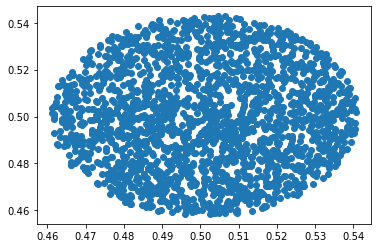

In [5]:
# Our constrained mask, can be sampled, can be evaluated
bounds = dynesty.bounding.bounding_ellipsoids(points)
samples = bounds.samples(2000)
vol = bounds.monte_carlo_vol()
bounds.contains(samples[0])
print(vol)
plt.scatter(samples[:,0], samples[:,1])
sampler

In [6]:
sampler.saved_

AttributeError: 'MultiEllipsoidSampler' object has no attribute 'saved_'

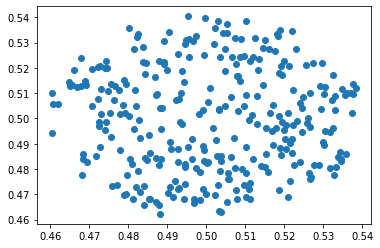

In [6]:
# Generate new set of livepoints
live_u = bounds.samples(300)
live_v = live_u
live_logl = np.array([loglike(x) for x in live_u])
live_points = [live_u, live_v, live_logl]
plt.scatter(live_u[:,0], live_u[:,1])

In [7]:
# Continue run with new loglike
nlive = len(live_u)
th = -4
sampler = dynesty.NestedSampler(loglike, ptform, ndim, nlive = nlive, live_points = deepcopy(live_points), method = 'unif', min_call = -np.inf, min_eff = np.inf)
sampler.mell = deepcopy(bounds)

In [8]:
sampler.run_nested(logl_max = th, add_live=False, maxiter = 10000)
points = sampler.live_u

113it [00:00, 790.37it/s, bound: 4 | nc: 997 | ncall: 2215 | eff(%):  5.102 | loglstar:   -inf < -10.777 < -4.000 | logz: -13.499 +/-  0.110 | dlogz: 13.146 >  0.010]

2 0.0033333333333333335
3 0.0023269804300050973
3 0.0022885822564436154
1 0.0022885822564436154
1 0.0022885822564436154
1 0.002258320427865424
3 0.002243339902516397
1 0.002243339902516397
3 0.00219899193225536
3 0.0021771478020067877
3 0.0021555206648355054
3 0.002134108365196978
1 0.002134108365196978
3 0.0021199517981890705
3 0.0020988928290673232
3 0.0020780430534663203
1 0.002071139255946498
3 0.0020505651760664395
1 0.0020505651760664395
3 0.0020234506375036167
3 0.0020100281164151107
3 0.0019966946333634284
3 0.001976860064169224
1 0.0019702924227600243
1 0.0019507201252544112
3 0.001931342253116943
3 0.0019121568749839786
3 0.0018931620786774672
1 0.0018868725036652496
1 0.0018868725036652496
3 0.0018619224665433365
3 0.0018434266838734108
1 0.0018373023427309739
1 0.0018373023427309739
3 0.0018251146327942036
1 0.0018251146327942036
1 0.0018190511290307675
3 0.0017949978911422433
1 0.0017949978911422433
1 0.0017890344429989135


193it [00:01, 98.62it/s, bound: 42 | nc: 574 | ncall: 25206 | eff(%):  0.766 | loglstar:   -inf < -8.236 < -4.000 | logz: -11.068 +/-  0.109 | dlogz: 10.444 >  0.010]

1 0.0017771669172514896
1 0.001759513070939248
1 0.0017536675125640348
3 0.0017362471023318568
3 0.001718999741261212
3 0.0016962694787375306
3 0.0016850173076056307
1 0.0016850173076056307
1 0.0016850173076056307
1 0.0016682788480421689
3 0.0016572123522234322
1 0.0016462192657929703
3 0.001624451376488018
3 0.0016136756093632697
1 0.0016136756093632697
1 0.0016136756093632697
3 0.001602971323083567
1 0.001602971323083567


229it [00:02, 77.92it/s, bound: 61 | nc: 366 | ncall: 36615 | eff(%):  0.625 | loglstar:   -inf < -7.348 < -4.000 | logz: -10.071 +/-  0.109 | dlogz:  9.322 >  0.010]

3 0.0015817752995374035
1 0.0015817752995374035
1 0.0015765202320970797
1 0.001566062415301566
3 0.001550505618173095
1 0.001550505618173095
3 0.001535103357629202
3 0.0015249202788780276
3 0.0015047563210631462
3 0.001489808520397069


251it [00:02, 78.32it/s, bound: 68 | nc: 145 | ncall: 40650 | eff(%):  0.617 | loglstar:   -inf < -6.986 < -4.000 | logz: -9.589 +/-  0.108 | dlogz:  8.761 >  0.010] 

3 0.0014652247613753159
3 0.0014362591355821326
1 0.0014362591355821326
3 0.001421991765534904
1 0.0014172675404002363


268it [00:03, 70.45it/s, bound: 77 | nc: 23 | ncall: 46287 | eff(%):  0.579 | loglstar:   -inf < -6.729 < -4.000 | logz: -9.274 +/-  0.107 | dlogz:  8.388 >  0.010] 

1 0.001412559010365684
1 0.0013985270702964112
1 0.0013985270702964112
3 0.0013892499677340979
3 0.0013754495727449796
3

281it [00:03, 67.25it/s, bound: 83 | nc: 976 | ncall: 49984 | eff(%):  0.562 | loglstar:   -inf < -6.560 < -4.000 | logz: -9.059 +/-  0.105 | dlogz:  8.128 >  0.010]Traceback (most recent call last):
  File "/home/weniger/miniconda3/lib/python3.7/site-packages/dynesty/dynesty.py", line 939, in __call__
    return self.func(x, *self.args, **self.kwargs)
KeyboardInterrupt
281it [00:03, 84.97it/s, bound: 83 | nc: 976 | ncall: 49984 | eff(%):  0.562 | loglstar:   -inf < -6.560 < -4.000 | logz: -9.059 +/-  0.105 | dlogz:  8.128 >  0.010]

 0.001348258687993531
1 0.0013393150397834216
3 0.0013172146169831346
1 0.0013172146169831346
1 0.001308476899024096
1 0.001308476899024096
Exception while calling loglikelihood function:
  params: [0.52829937 0.84048746]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

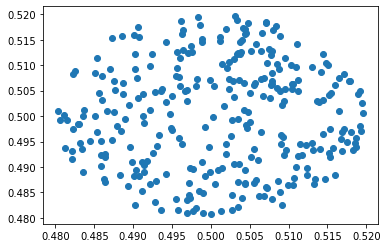

In [155]:
plt.scatter(points[:,0], points[:,1])